In [1]:
import numpy as np
import matplotlib.pylab as plt
import blimpy as bl
%matplotlib inline

In [2]:
from typing import List, Tuple

from astropy.time import Time
from astropy import units as u

In [3]:
MAX_IMSHOW_POINTS   = (8192, 4096)           # Max number of points in imshow plot


def plot_waterfall(fil, f_start=None, f_stop=None, if_id=0, 
                   logged=True, cb=False, freq_label=False, MJD_time=False, 
                   left_line=None, right_line=None, **kwargs):
    """ Plot waterfall of data
    Args:
        f_start (float): start frequency, in MHz
        f_stop (float): stop frequency, in MHz
        logged (bool): Plot in linear (False) or dB units (True),
        cb (bool): for plotting the colorbar
        kwargs: keyword args to be passed to matplotlib imshow()
    """


    plt.rc('font', size=12)

    plot_f, plot_data = fil.grab_data(f_start, f_stop, if_id)

    # Make sure waterfall plot is under 4k*4k
    dec_fac_x, dec_fac_y = 1, 1
    if plot_data.shape[0] > MAX_IMSHOW_POINTS[0]:
        dec_fac_x = plot_data.shape[0] / MAX_IMSHOW_POINTS[0]

    if plot_data.shape[1] > MAX_IMSHOW_POINTS[1]:
        dec_fac_y =  plot_data.shape[1] /  MAX_IMSHOW_POINTS[1]

    #print(dec_fac_x)
        
    plot_data = bl.utils.rebin(plot_data, int(dec_fac_x), int(dec_fac_y))

    if MJD_time:
        extent=(plot_f[0], plot_f[-1], fil.timestamps[-1], fil.timestamps[0])
    else:
        extent=(plot_f[0], plot_f[-1], (fil.timestamps[-1]-fil.timestamps[0])*24.*60.*60, 0.0)

    this_plot = plt.imshow(plot_data,
        aspect='auto',
        rasterized=True,
        interpolation='nearest',
        extent=extent,
        cmap='hot',
        **kwargs
    )
    if cb:
        plt.colorbar()

    if freq_label:
        plt.xlabel("Frequency (Hz)")
    if MJD_time:
        plt.ylabel("Time (MJD)")
    else:
        plt.ylabel("Time (s)")

    return this_plot

def make_waterfall_plots(filenames_list, target, f_start, f_stop, ion=False, correction_in=0, 
                         line1=None, line2=None, **kwargs):
    ''' Makes waterfall plots per group of ON-OFF pairs (up to 6 plots.)
    '''

    plt.rc('font', size=12)

    if ion:
        plt.ion()

    n_plots = len(filenames_list)
    fig = plt.subplots(n_plots, sharex=True, sharey=True)
#    fig = plt.subplots(n_plots, sharex=True, sharey=True, figsize=(10, 2*n_plots))
#    fig = plt.subplots(1, 2, 1, sharex=True, sharey=True)

    fil = bl.Waterfall(filenames_list[0], f_start=f_start, f_stop=f_stop)
    
    A1_avg = np.median(fil.data)
    A1_max = fil.data.max()
    A1_std = np.std(fil.data)

    labeling = ['A','B','A','C','A','D']

    delta_f = np.abs(f_start-f_stop)
    mid_f = np.abs(f_start+f_stop)/2.
    
    #Adjust the incorrect header data
    correction = mid_f - correction_in
    mid_f_text = mid_f - correction

    for i,filename in enumerate(filenames_list):
        plt.subplot(n_plots, 2, (2 * i) + 1)

        fil = bl.Waterfall(filename, f_start=f_start, f_stop=f_stop)

        this_plot = plot_waterfall(fil,f_start=f_start, f_stop=f_stop,
                                   vmin=A1_avg-A1_std*0,vmax=A1_avg+5.*A1_std,**kwargs)
        
        if line1 != None:
            plt.axvline(x=line1, color = 'white', ls='--')
        if line2 != None:
            plt.axvline(x=line2, color = 'white', ls='--')

        if i == 0:
            plt.title('Waterfall')

        if i < len(filenames_list)-1:
            plt.xticks(np.arange(f_start, f_stop, delta_f/4.), ['','','',''])

    #Some plot formatting.
    ax = plt.gca()
    #ax.invert_xaxis()
    ax.get_xaxis().get_major_formatter().set_useOffset(False)
    
    if target == 'HIP7981':
        #f_start -= 0.3
        #f_stop  += 0.3
        factor = 1e3
        units = 'kHz'
    else:
        factor = 1e6
        units = 'Hz'
    
    plt.xticks(np.arange(f_start, f_stop, delta_f/4.),
               [round(loc_freq) for loc_freq in np.arange(
                   (f_start-mid_f), (f_stop-mid_f), delta_f/4.)*factor])
    plt.xlabel("Relative frequency in %s from %f MHz"%(units, mid_f))
    

    #to plot color bar. for now.
#    cax = fig[0].add_axes([0.9, 0.12, 0.03, 0.75])
#    fig[0].colorbar(this_plot,cax=cax,label='Power (Arbitrary Units)')

    # Fine-tune figure; make subplots close to each other and hide x ticks for
    # all but bottom plot.
#    plt.subplots_adjust(hspace=0,wspace=0)

In [4]:
TELESCOPE = 'GBT'
OBS_TIME = '300s x 3'

In [5]:
all_targets = []

f = open('result_prior_filenames.txt', 'r')
text = f.read().split()
f.close()

for word in text:
    if 'directory' not in word and '.csv' in word:
        all_targets.append(word[:-4])

In [6]:
all_targets

['GJ905',
 'HIP100859',
 'HIP108036',
 'HIP108092',
 'HIP11029',
 'HIP110750',
 'HIP113718',
 'HIP116106',
 'HIP118162',
 'HIP13402',
 'HIP1368',
 'HIP1444',
 'HIP15638',
 'HIP2',
 'HIP21029',
 'HIP21402',
 'HIP21547',
 'HIP22762',
 'HIP27803',
 'HIP32423',
 'HIP33955',
 'HIP34115',
 'HIP36915',
 'HIP4151',
 'HIP43557',
 'HIP44901',
 'HIP46549',
 'HIP50583',
 'HIP53910',
 'HIP54966',
 'HIP63762',
 'HIP64577',
 'HIP65714',
 'HIP77725',
 'HIP82588',
 'HIP8497',
 'HIP86201',
 'HIP91237',
 'HIP97222',
 'HIP99031']

In [7]:
print(len(all_targets))

40


In [8]:
def get_cadence(target_name: str) -> List[str]:
    
    cadence = []

    filename = 'result_prior/' + target_name + '_directory.csv'
    f = open(filename, 'r')

    lines = f.readlines()
    f.close()

    for line in lines[1:]:
        info = line.strip().split(',')
        h5file = info[1][12:]
        cadence.append(h5file)
    
    return cadence

In [9]:
def get_hits(target_name: str) -> List[List[float]]:
    
    hits = []

    filename = 'result_prior/' + target_name + '.csv'
    f = open(filename, 'r')

    lines = f.readlines()
    f.close()

    for line in lines[1:]:
        info = line.strip().split(',')
        start = float(info[1])
        stop = float(info[2])
        fit = float(info[3])
        #snr = float(info[4])
        #hits.append([start, stop, fit, snr])
        hits.append([start, stop, fit])

    return hits

In [10]:
class Target:
    
    
    def __init__(self, target_name: str) -> None:
        
        self.name = target_name
        self.cadence = get_cadence(target_name)
        self.hits = get_hits(target_name)
        self.num_hits = len(self.hits)
    
    def __str__(self) -> str:
        
        return 'Target {} with {} hits'.format(self.name, self.num_hits)
    
    
    def get_cadence_type(self) -> str:
        
        if len(self.cadence) == 6:
        
            lst = []

            for i in range(len(self.cadence)):
                fb = bl.Waterfall(self.cadence[i], load_data=False)
                source = fb.header['source_name']
                lst.append(source)

            if lst[0] == lst[2] == lst[4]:
                
                if lst[1] == lst[3] == lst[5] \
                and lst[0] != lst[1]:
                    return 'ABABAB'
                          
                elif lst[1] != lst[3] and lst[1] != lst[5] and lst[3] != lst[5] \
                and lst[0] != lst[1] and lst[0] != lst[3] and lst[0] != lst[5]:
                    return 'ABACAD'
        
        return 'other'
    
    
    def get_RA(self) -> str:
        
        fb = bl.Waterfall(self.cadence[0], load_data=False)
        RA = fb.header['src_raj']
        
        return str(RA)
    
    
    def get_DEC(self) -> str:
        
        fb = bl.Waterfall(self.cadence[0], load_data=False)
        DEC = fb.header['src_dej']
        
        return str(DEC)
    
    
    def get_date_time(self, ISOT=True) -> str:
        
        fb = bl.Waterfall(self.cadence[0], load_data=False)
        mjd = fb.header['tstart']
        
        if ISOT:
            return Time(mjd, format='mjd').isot
        
        return str(mjd)
    
    
    def get_min_freq(self) -> str:
        
        fb = bl.Waterfall(self.cadence[0], load_data=False)
        
        if fb.header['foff'] < 0:
            min_freq = fb.container.f_start - fb.header['foff']
        else:
            min_freq = fb.container.f_start
        
        return str(min_freq) + ' MHz'
    

    def get_max_freq(self) -> str:
        
        fb = bl.Waterfall(self.cadence[0], load_data=False)
        
        if fb.header['foff'] < 0:
            max_freq = fb.container.f_stop

        else:
            max_freq = fb.container.f_stop - fb.header['foff']
        
        return str(max_freq) + ' MHz'

In [11]:
COLUMN = 52

In [12]:
class Hit:
    
    
    def __init__(self, target: Target, index: int) -> None:
        
        self.target = target
        self.target_name = target.name
        self.number = index + 1
        self.start_freq = target.hits[index][0]
        self.end_freq = target.hits[index][1]
        self.fit = target.hits[index][2]
        #self.SNR = target.hits[index][3]
    
    def __str__(self) -> str:
        
        return 'Hit {} of {} for target {}'.format(self.number, self.target.num_hits, self.target_name)
    
    
    def make_plot(self):
        
        plt.rc('font', size=10)
        
        mid_freqs = []
        fits = []
        
        for i in range(self.target.num_hits):

            mid_freq = (self.target.hits[i][0] + self.target.hits[i][1]) / 2
            mid_freqs.append(mid_freq)
            
            fit = self.target.hits[i][2]
            fits.append(fit)

        #plt.scatter(mid_freqs, fits, color='gray')
        plt.scatter(mid_freqs, fits, color='gray', marker='.')
        
        mid = (self.start_freq + self.end_freq) / 2
        plt.plot(mid, self.fit, marker='o', color='red', ms=8)
        
        plot_start = float(self.target.get_min_freq()[:-4])
        plot_end = float(self.target.get_max_freq()[:-4])
        plt.xlim(plot_start, plot_end)
        
        plt.grid()
        plt.xlabel('Frequency (MHz)')
        plt.ylabel('Fit')
        plt.title('Position of hit in the frequency band')
        

    def print_info(self):
        
        s1 = 'Target name: ' + self.target_name
        s2 = 'Number of hits for this target: ' + str(self.target.num_hits)
        tab = ' ' * (COLUMN - len(s1))
        print(s1, tab, s2)
        
        s1 = 'Right ascension: ' + self.target.get_RA()
        s2 = 'Average number of hits per target: ' + str(avg_num_hits)
        tab = ' ' * (COLUMN - len(s1))
        print(s1, tab, s2)
        
        s1 = 'Declination: ' + self.target.get_DEC()
        print(s1)

        s1 = 'Telescope: ' + TELESCOPE
        print(s1)

        s1 = 'Observation start (MJD): ' + self.target.get_date_time(ISOT=False)
        s2 = '\t\tHit #' + str(self.number) + ' of ' + str(self.target.num_hits)
        tab = ' ' * (COLUMN - len(s1))
        print(s1, tab, s2)

        s1 = 'Observation start (ISOT): ' + self.target.get_date_time()
        s2 = 'Start frequency: ' + str(self.start_freq) + ' MHz'
        tab = ' ' * (COLUMN - len(s1))
        print(s1, tab, s2)
        
        s1 = 'Observing time: ' + OBS_TIME
        s2 = 'End frequency: ' + str(self.end_freq) + ' MHz'
        tab = ' ' * (COLUMN - len(s1))
        print(s1, tab, s2)
        
        s1 = 'Cadence: ' + self.target.get_cadence_type()
        s2 = 'Event bandwidth: ' + str((self.end_freq - self.start_freq) * 1e6) + ' Hz'
        tab = ' ' * (COLUMN - len(s1))
        print(s1, tab, s2)

        s1 = 'Min frequency: ' + self.target.get_min_freq()
#        s2 = 'Fit: ' + str(self.fit * 100) + '%'
        s2 = 'Probability: ' + str(self.fit * 100) + '%'
        tab = ' ' * (COLUMN - len(s1))
        print(s1, tab, s2)

        s1 = 'Max frequency: ' + self.target.get_max_freq()
        #s2 = 'SNR: ' + str(self.SNR)
        #tab = ' ' * (COLUMN - len(s1))
        #print(s1, tab, s2)
        print(s1)

In [13]:
num_hits_per_target = []

for target_name in all_targets:
    n = Target(target_name).num_hits
    num_hits_per_target.append(n)

avg_num_hits = np.sum(num_hits_per_target) / len(all_targets)

In [14]:
np.max(num_hits_per_target)

626

In [15]:
def plot_highlighted_hist(target: Target):

    plt.rc('font', size=10)
    
    binning = np.arange(0, 700, 20)

    array, bins, patches = plt.hist(num_hits_per_target, bins=binning, color='gray')

    n = target.num_hits // 20
    patches[n].set_fc('red')

    plt.grid()
    plt.xlabel('Number of hits')
    plt.ylabel('Number of targets')
    plt.title('Hits per target')

In [16]:
# To pick a target, redefine i or directly define target as the corresponding string:
i = 36
target = Target(all_targets[i])

target = Target('HIP54966')

In [17]:
target.num_hits

3

In [18]:
# To pick a hit, redefine j
j = 2
hit = Hit(target, j)

					Candidate information

Target name: HIP54966                                 Number of hits for this target: 3
Right ascension: 11h15m21.199s                        Average number of hits per target: 66.95
Declination: -18d31m46.997s
Telescope: GBT
Observation start (MJD): 57464.25134259259            		Hit #3 of 3
Observation start (ISOT): 2016-03-17T06:01:56.000     Start frequency: 1694.4032032024281 MHz
Observing time: 300s x 3                              End frequency: 1694.4039290913033 MHz
Cadence: ABABAB                                       Event bandwidth: 725.8888751948689 Hz
Min frequency: 1126.4648465855034 MHz                 Probability: 75.48399567604065%
Max frequency: 1876.46484375 MHz


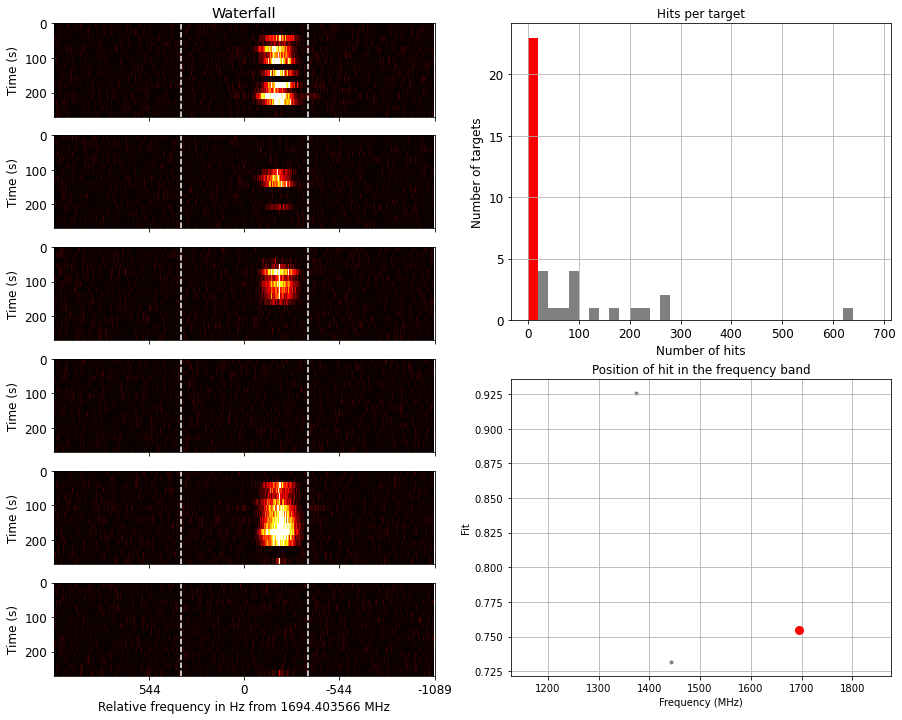

In [19]:
print('\t\t\t\t\tCandidate information\n')

hit.print_info()


diff = hit.end_freq - hit.start_freq

start = hit.start_freq - diff
stop = hit.end_freq + diff
mid = (start + stop) / 2

make_waterfall_plots(filenames_list=target.cadence, target=target.name, 
                     f_start=start, f_stop=stop, correction_in=mid, 
                     line1=hit.start_freq, line2=hit.end_freq)


plt.subplot(2, 2, 2)
plot_highlighted_hist(target)

plt.subplot(2, 2, 4)
hit.make_plot()

plt.gcf().set_size_inches(15, 12)    
plt.show()

					Candidate information

Target name: HIP54966                                 Number of hits for this target: 3
Right ascension: 11h15m21.199s                        Average number of hits per target: 66.95
Declination: -18d31m46.997s
Telescope: GBT
Observation start (MJD): 57464.25134259259            		Hit #3 of 3
Observation start (ISOT): 2016-03-17T06:01:56.000     Start frequency: 1694.4032032024281 MHz
Observing time: 300s x 3                              End frequency: 1694.4039290913033 MHz
Cadence: ABABAB                                       Event bandwidth: 725.8888751948689 Hz
Min frequency: 1126.4648465855034 MHz                 Probability: 75.48399567604065%
Max frequency: 1876.46484375 MHz


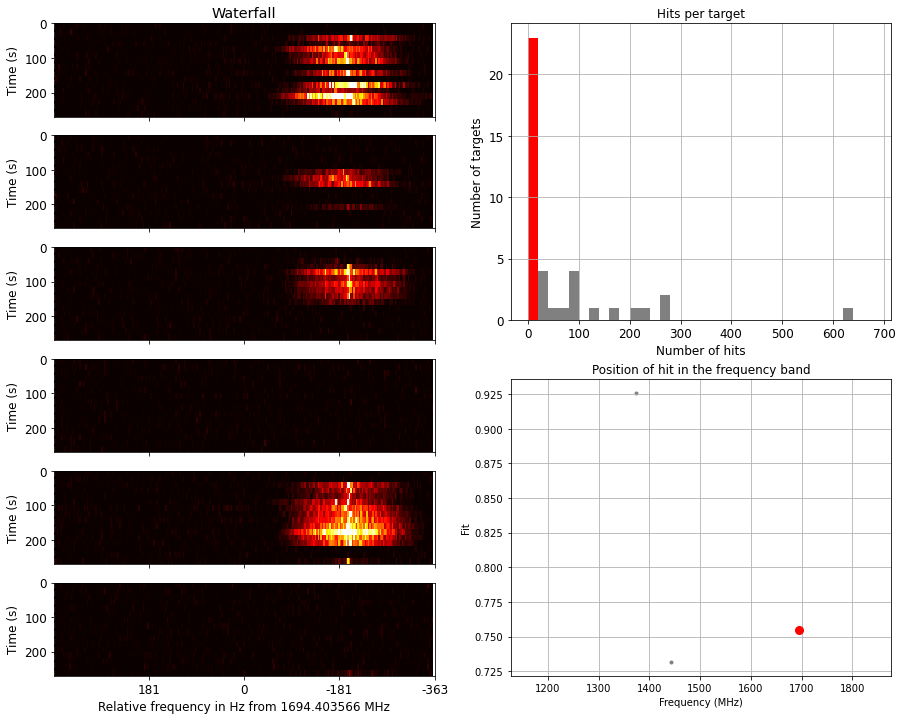

In [20]:
print('\t\t\t\t\tCandidate information\n')

hit.print_info()


diff = hit.end_freq - hit.start_freq

start = hit.start_freq #- diff
stop = hit.end_freq #+ diff
mid = (start + stop) / 2

make_waterfall_plots(filenames_list=target.cadence, target=target.name, 
                     f_start=start, f_stop=stop, correction_in=mid, 
                     line1=hit.start_freq, line2=hit.end_freq)


plt.subplot(2, 2, 2)
plot_highlighted_hist(target)

plt.subplot(2, 2, 4)
hit.make_plot()

plt.gcf().set_size_inches(15, 12)    
plt.show()

In [21]:
tab = ' ' * (14 - len('Target index'))

print('Target index', tab, 'Number of hits')

for i, num in enumerate(num_hits_per_target):
    tab = ' ' * (14 - len(str(i)))
    print(i, tab, num)

Target index    Number of hits
0               10
1               215
2               42
3               272
4               12
5               172
6               12
7               29
8               11
9               13
10              35
11              10
12              4
13              3
14              70
15              136
16              5
17              239
18              2
19              85
20              3
21              3
22              2
23              11
24              5
25              5
26              87
27              87
28              30
29              3
30              97
31              2
32              11
33              28
34              263
35              9
36              0
37              626
38              18
39              11


In [ ]:
print('\t\t\t\t\tCandidate information\n')

hit.print_info()


diff = hit.end_freq - hit.start_freq

start = hit.start_freq - diff
stop = hit.end_freq + diff
mid = (start + stop) / 2

make_waterfall_plots(filenames_list=target.cadence, target=target.name, 
                     f_start=start, f_stop=stop, correction_in=mid)


plt.subplot(2, 2, 2)
plot_highlighted_hist(target)

plt.subplot(2, 2, 4)
hit.make_plot()

plt.gcf().set_size_inches(15, 10)
plt.show()

In [ ]:
print('\t\t\t\t\tCandidate information\n')

hit.print_info()


diff = hit.end_freq - hit.start_freq

start = hit.start_freq - diff
stop = hit.end_freq + diff

make_waterfall_plots(filenames_list=target.cadence, target=target.name, f_start=start, f_stop=stop)


plt.subplot(2, 2, 2)
plot_highlighted_hist(target)

plt.subplot(2, 2, 4)
hit.make_plot()

plt.gcf().set_size_inches(15, 10)
plt.show()

In [ ]:
print('\t\t\t\t\tCandidate information\n')

hit.print_info()

plt.subplot(1, 2, 1)
plot_highlighted_hist(target)

plt.subplot(2, 2, 2)
plot_highlighted_hist(target)

plt.subplot(2, 2, 4)
hit.make_plot()

plt.gcf().set_size_inches(15, 10)
plt.show()

In [ ]:
diff = hit.end_freq - hit.start_freq

start = hit.start_freq - diff
stop = hit.end_freq + diff

make_waterfall_plots(filenames_list=target.cadence, target=target.name, f_start=start, f_stop=stop)

plt.gcf().set_size_inches(15, 10)
plt.show()

In [ ]:
plt.subplot(2, 2, 1)
hit.print_info()

plt.subplot(2, 2, 2)
plot_highlighted_hist(target)

plt.subplot(2, 2, 4)
hit.make_plot()

plt.gcf().set_size_inches(15, 10)
plt.show()


start = hit.start_freq
stop = hit.end_freq
mid = (start + stop) / 2

make_waterfall_plots(filenames_list=target.cadence, target=target.name, 
                     f_start=start, f_stop=stop, correction_in=mid)

In [ ]:
bl.Waterfall(target.cadence[0], f_start=hit.start_freq, f_stop=hit.end_freq)

In [ ]:
help(bl.Waterfall)

À faire:

- Remove space and ticks
- x-axis label
- Add two lines that delimit event
- Add and adjust colorbar